# ANÁLISIS POPULARIDAD DE LOS SHOW

### Autor:Pedro Jofre
### Curso:Data Science II: Machine Learning para la Ciencia de Datos
### comision: 61190
#### source:https://www.kaggle.com/datasets/asaniczka/full-tmdb-tv-shows-dataset-2023-150k-shows?resource=download.

## Objetivos
Obtener datos de diversas fuentes públicas para luego analizarlos mediante el lenguaje Python con el fin de contestar preguntas de interés para una industria, negocio o proyecto personal. Se deberán utilizar datasets complejos implementando técnicas avanzadas para la limpieza y adquisición de datos
<br>
Contar una historia que ponga el contexto la solución que se aplicará.

Estructurar el contexto en función de múltiples pero simples preguntas/hipótesis a responder
Importar datos crudos usando herramientas de Python
Limpiar y transformar los datos para permitir un posterior análisis
Generar el Análisis exploratorio de Datos (EDA).
Generar el Análisis estadístico de Datos ( Univariado, Bivariado y Multivariado*)


## Contexto
### The Movie Database

El conjunto de datos proporciona información crucial para analizar las tendencias y predecir el éxito de películas y shows de televisión utilizando información de The Movie Database (TMDB). La base de datos esta compuesta por 29 variables y mas de 150000 registros, los cuales incluyen atributos interesantes de analisis como el genero, popularidad y fecha de emision, permitiendo la segmentación y análisis detallado. Esta cantidad de datos permite una comprensión profunda y detallada de las preferencias y comportamientos de la audiencia.

Los análisis derivados de este dataset presentan una oportunidad valiosa para la industria del entretenimiento, permitiendo la identificación de factores que impulsan la popularidad, la evaluación de la efectividad de estrategias de lanzamiento y marketing, y la formulación de recomendaciones personalizadas para los usuarios, por mencionar algunos.

Este conjunto de datos es una herramienta invaluable para investigadores y profesionales de la industria del entretenimiento, contribuyendo a la mejora de la toma de decisiones estratégicas, la personalización de la experiencia del usuario y el incremento de la satisfacción y retención de la audiencia. 

### Hipotesis

En primer lugar, se espera analizar cómo ha evolucionado la cantidad de programas a lo largo de los años. Se anticipa encontrar un aumento constante en la cantidad de estrenos debido al avance tecnológico y la expansión del acceso a plataformas de distribución de contenido. Además, se espera observar un cambio notable en el período de la pandemia de COVID-19, ya que este evento probablemente generó un efecto significativo en el comportamiento de las personas, afectando tanto la producción como el consumo de entretenimiento. Ademas de analizar como varia segun la estacion del año en que se estrena.
Por ultimo se espera encontrar cuales son las variables con mayor relacion al momento de determinar la popularidad de un programa.

#### preguntas
Existe un aumento en la cantidad de show emitidos a traves del tiempo? <br>
En que estacion se tiene mayor estreno/finalizacion de show?<br>
existe una relacion entre los generos y la estacion ?<br>
Que generos son los mas populares? <br>
cual es la lengua mas popular?<br>
Como medir la eficiencia de un show? <br>

En primer lugar se carga las librerias necesarias y la base previamente descargada.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import MonthLocator, DateFormatter, AutoDateLocator,AutoDateFormatter,YearLocator
import seaborn as sns
from wordcloud import WordCloud


In [2]:
table= pd.read_csv('TMDB_tv_dataset_v3.csv')
table.head()

,id,name,number_of_seasons,number_of_episodes,original_language,vote_count,vote_average,overview,adult,backdrop_path,...,tagline,genres,created_by,languages,networks,origin_country,spoken_languages,production_companies,production_countries,episode_run_time
0,1399,Game of Thrones,8,73,en,21857,8.442,Seven noble families fight for control of the ...,False,/2OMB0ynKlyIenMJWI2Dy9IWT4c.jpg,...,Winter Is Coming,"Sci-Fi & Fantasy, Drama, Action & Adventure","David Benioff, D.B. Weiss",en,HBO,US,English,"Revolution Sun Studios, Television 360, Genera...","United Kingdom, United States of America",0
1,71446,Money Heist,3,41,es,17836,8.257,"To carry out the biggest heist in history, a m...",False,/gFZriCkpJYsApPZEF3jhxL4yLzG.jpg,...,The perfect robbery.,"Crime, Drama",Álex Pina,es,"Netflix, Antena 3",ES,Español,Vancouver Media,Spain,70
2,66732,Stranger Things,4,34,en,16161,8.624,"When a young boy vanishes, a small town uncove...",False,/2MaumbgBlW1NoPo3ZJO38A6v7OS.jpg,...,Every ending has a beginning.,"Drama, Sci-Fi & Fantasy, Mystery","Matt Duffer, Ross Duffer",en,Netflix,US,English,"21 Laps Entertainment, Monkey Massacre Product...",United States of America,0
3,1402,The Walking Dead,11,177,en,15432,8.121,Sheriff's deputy Rick Grimes awakens from a co...,False,/x4salpjB11umlUOltfNvSSrjSXm.jpg,...,Fight the dead. Fear the living.,"Action & Adventure, Drama, Sci-Fi & Fantasy",Frank Darabont,en,AMC,US,English,"AMC Studios, Circle of Confusion, Valhalla Mot...",United States of America,42
4,63174,Lucifer,6,93,en,13870,8.486,"Bored and unhappy as the Lord of Hell, Lucifer...",False,/aDBRtunw49UF4XmqfyNuD9nlYIu.jpg,...,It's good to be bad.,"Crime, Sci-Fi & Fantasy",Tom Kapinos,en,"FOX, Netflix",US,English,"Warner Bros. Television, DC Entertainment, Jer...",United States of America,45


In [3]:
table.shape

(168639, 29)

In [4]:
table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168639 entries, 0 to 168638
Data columns (total 29 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    168639 non-null  int64  
 1   name                  168634 non-null  object 
 2   number_of_seasons     168639 non-null  int64  
 3   number_of_episodes    168639 non-null  int64  
 4   original_language     168639 non-null  object 
 5   vote_count            168639 non-null  int64  
 6   vote_average          168639 non-null  float64
 7   overview              93333 non-null   object 
 8   adult                 168639 non-null  bool   
 9   backdrop_path         77780 non-null   object 
 10  first_air_date        136903 non-null  object 
 11  last_air_date         138735 non-null  object 
 12  homepage              50998 non-null   object 
 13  in_production         168639 non-null  bool   
 14  original_name         168634 non-null  object 
 15  

A continuacion revisamos los faltantes de la base

<Axes: >

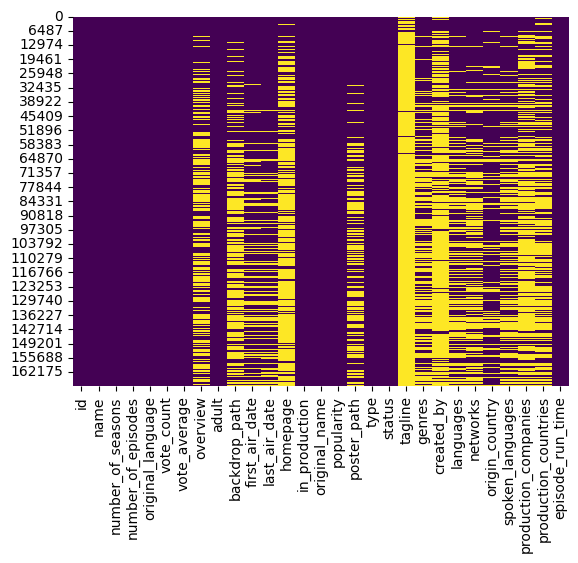

In [5]:
sns.heatmap(table.isnull(),cmap='viridis',cbar=False)

In [6]:
(table.isnull().sum()).sum()

1190189

Como se puede observar los datos poseen una gran cantidad de datos faltantes. Por lo que en primer lugar se una limpieza de datos, a continuacion se dara un resumen de los puntos mas importantes, se puede observar todos los pasos tomados en la transformacion en el notebook "data_wrapping Jofre.ipynb".<br> Para facilitar la visualizacion de la data es necesario renombrar las variables a traves de la funcion rename. 

In [7]:
nombres_columnas= {'id':"id",
'name':"Nombre_Serie",
'number_of_seasons':"num_Temporadas",
'number_of_episodes':"num_Episodios",
'original_language':"Idioma_original",
'vote_count':"Votos_Totales",
'vote_average':"Voto_promedio",
'overview':"Resumen",
'adult':"Categoria_Adulto",
'backdrop_path':"url_Imagen",
'first_air_date':"Fecha_Inicio",
'last_air_date':"Fecha_Fin",
'homepage':"Pagina",
'in_production':"En_Produccion",
'original_name':"Nombre_Original",
'popularity':"Popularidad",
'poster_path':"url_Poster",
'type':"Tipo_Show",
'status':"Status",
'tagline':"Frase",
'genres':"Generos",
'created_by':"Creador",
'languages':"Idiomas",
'networks':"Canales",
'origin_country':"Pais_Origen",
'spoken_languages':"Idiomas_hablados",
'production_companies':"Companias_Produccion",
'production_countries':"Paises_Produccion",
'episode_run_time':"Duracion_episodio"}

table.rename(columns=nombres_columnas,inplace=True)

- En primer lugar se eliminaran los 5 registros que no poseen nombre, ya que corresponden a un porcentaje menor del 0.01% 
- Se eliminan los campos que no entregan mayor informacion relevante para el analisis propuesto como:Resumen,url_Imagen,Pagina,url_Poster,Frase
- Se elimina las filas que no poseen fecha de inicio o fin 
- Se rellena la informacion faltante en los campos 'Generos','Creador','Idiomas','Canales','Pais_Origen','Idiomas_hablados','Companias_Produccion','Paises_Produccion' como 'sin informacion'

In [8]:
table=table.dropna(subset=['Nombre_Serie'])
table=table.drop(columns=['Resumen','url_Imagen','url_Poster','Frase','Pagina'])
table=table.dropna(subset=['Fecha_Inicio','Fecha_Fin' ])
columnas= ['Generos','Creador','Idiomas','Canales','Pais_Origen','Idiomas_hablados','Companias_Produccion','Paises_Produccion']
for c in columnas:
    table[c]=table[c].fillna('sin informacion')

In [9]:
table.shape

(135806, 24)

Se puede observar que luego de los cambios se mantiene sobre un 80% de los datos originales

A continuacion se realiza el proceso de enriquecimiento, donde generaremos nuevos campos a partir de la informacion recolectada para la calidad de nuestra base, al igual que el tratamiento de nulos si quiere revisar en detalles todos los pasos los puede observar en el notebook "data_wrapping Jofre.ipynb". Para dar un resumen los procesos realizados fueron los siguientes:<br>
1- para cada columna que consiste en un array de string se crea un nuevo campo que muestre cuantos datos existen en la columna, como por ejemplo generos.<br>
2- se crea nuevas columnas relacionada a la fecha, como año, mes y estacion.<br>
3- Se crean bases de datos auxiliares de los campos trabajados en el punto 1 utilizando el id del show como llave foreana. <br>
4- se eliminan las columnas del punto 1 y se guarda la nueva base base transformada.

Los pasos anteriores dan como resultados una base de datos con esquema de estrella, con la tabla de hechos siendo "TMDB_procesado.csv" y 8 tablas de dimensiones, las cuales muestran informacion adicional para cada show.

In [10]:
tmdb=pd.read_csv('TMDB_procesado.csv')
tmdb.head()

,id,Nombre_Serie,num_Temporadas,num_Episodios,Votos_Totales,Voto_promedio,Categoria_Adulto,Fecha_Inicio,Fecha_Fin,En_Produccion,...,num_Paises_Produccion,num_Pais_Origen,Mes_I,estacion_I,estacion_I_n,anho_I,Mes_F,estacion_F,estacion_F_n,anho_F
0,1399,Game of Thrones,8,73,21857,8.442,False,2011-04-17,2019-05-19,False,...,2,1,4,0,primavera,2011,5,1,verano,2019
1,71446,Money Heist,3,41,17836,8.257,False,2017-05-02,2021-12-03,False,...,1,1,5,1,verano,2017,12,0,primavera,2021
2,66732,Stranger Things,4,34,16161,8.624,False,2016-07-15,2022-07-01,True,...,1,1,7,3,invierno,2016,7,3,invierno,2022
3,1402,The Walking Dead,11,177,15432,8.121,False,2010-10-31,2022-11-20,False,...,1,1,10,2,otoño,2010,11,3,invierno,2022
4,63174,Lucifer,6,93,13870,8.486,False,2016-01-25,2021-09-10,False,...,1,1,1,1,verano,2016,9,1,verano,2021


Una vez que se ha limpiado y enriquecido la base, es necesario estudiar en mas detalle las variables a trabajar, en primer lugar se estudiara las variables categoricas.

C:\Users\Pedro\AppData\Local\Temp\ipykernel_16076\2659127758.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")
C:\Users\Pedro\AppData\Local\Temp\ipykernel_16076\2659127758.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")
C:\Users\Pedro\AppData\Local\Temp\ipykernel_16076\2659127758.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3.set_xticklabels(ax3.get_xticklabels(), rotation=40, ha="right")
C:\Users\Pedro\AppData\Local\Temp\ipykernel_16076\2659127758.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax4.

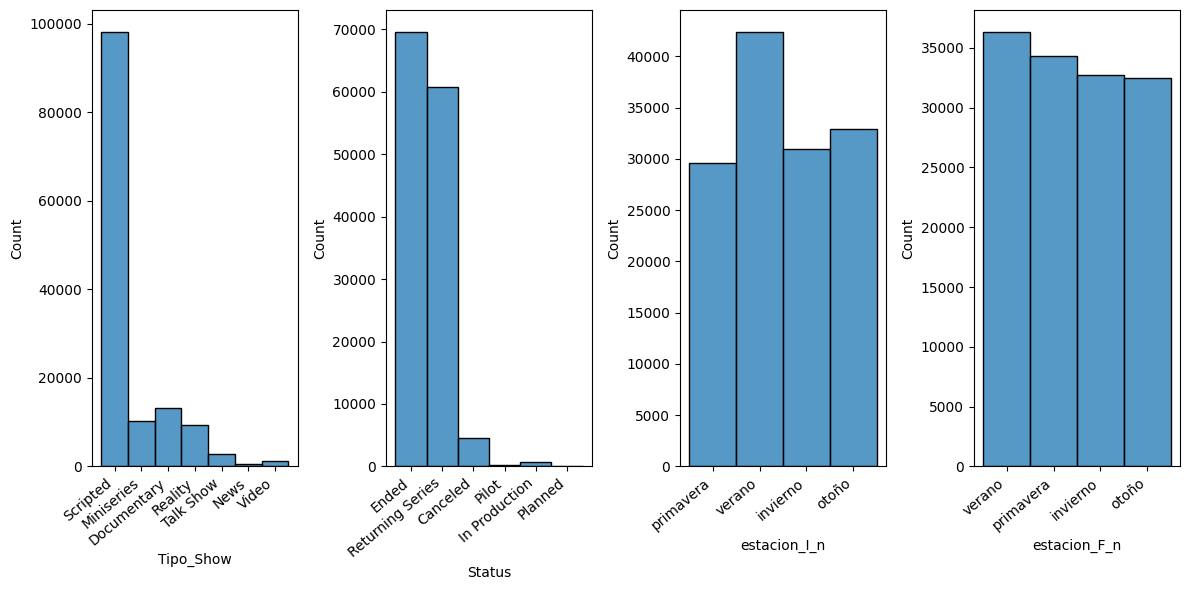

In [11]:
fig, axis = plt.subplots(1, 4, figsize = (12, 6))

# Crear un histograma múltiple
ax1=sns.histplot(ax = axis[ 0], data = tmdb, x = "Tipo_Show")
ax2=sns.histplot(ax = axis[1], data = tmdb, x = "Status")
ax3=sns.histplot(ax = axis[ 2], data = tmdb, x = "estacion_I_n")
ax4=sns.histplot(ax = axis[3], data = tmdb, x = "estacion_F_n")

# Ajustar el layout
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=40, ha="right")
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()

# Mostrar el plot
plt.show()


tipo show: Se puede observar que existe una diferencia entre la cantidad e show scripted y el resto<br>
Status: en este caso los valores estan desvalanceados hacia los Ended y Returning series <br>
Estaciones de inicio: se observa que en verano se tiene un mayor porcentaje de show en estreno, lo cual puede estar relacionado a que esta epoca corresponde a cuando la mayor parte de la poblacion esta en vacaciones por lo que las productoras aprovechan de estrenar nuevos show al tener mayor publico<br>
Estacion de Fin: A diferencia de la estacion de inicio aca no se observa una mayor diferencia entre la cantidad de show terminados por fecha.  

Se crean nuevas columnas boleanas para indicar si el show es scripted, si esta en estado terminado o esta en estado de restreno.  

In [12]:
tmdb['scripted']=tmdb['Tipo_Show'].apply(lambda x: 1 if x=='Scripted' else 0)
tmdb['Terminado']=tmdb['Status'].apply(lambda x: 1 if x=='Ended' else 0)
tmdb['Serie reestrenada']=tmdb['Status'].apply(lambda x: 1 if x=='Returning Series' else 0)

In [13]:
tmdb['Terminado'].value_counts()
tmdb['Serie reestrenada'].value_counts()

Serie reestrenada
0    75114
1    60692
Name: count, dtype: int64

In [14]:
tmdb_corr=tmdb.drop(columns=["Nombre_Serie","Fecha_Inicio","Fecha_Fin","Nombre_Original","estacion_I_n","estacion_F_n","Tipo_Show","Status","Pais_Origen"])
tmdb_corr.corr()

,id,num_Temporadas,num_Episodios,Votos_Totales,Voto_promedio,Categoria_Adulto,En_Produccion,Popularidad,Duracion_episodio,num_Generos,...,num_Pais_Origen,Mes_I,estacion_I,anho_I,Mes_F,estacion_F,anho_F,scripted,Terminado,Serie reestrenada
id,1.000000,-0.161406,-0.101966,-0.066268,-0.290441,0.015495,0.403314,-0.078248,-0.210060,-0.187494,...,0.073124,0.006806,0.008097,0.405007,0.005987,0.021949,0.363979,-0.072621,-0.383627,0.400662
num_Temporadas,-0.161406,1.000000,0.412525,0.062667,0.119237,-0.024301,0.069773,0.185672,0.054484,0.059834,...,0.055553,-0.000002,-0.005535,-0.148751,0.017122,-0.012423,0.042809,-0.072262,-0.077111,0.067532
num_Episodios,-0.101966,0.412525,1.000000,0.033175,0.076141,-0.020801,0.000474,0.339565,0.028152,0.067845,...,0.042270,0.002441,-0.004559,-0.091749,0.012901,0.000186,0.008792,-0.000792,-0.003709,0.000717
Votos_Totales,-0.066268,0.062667,0.033175,1.000000,0.107980,-0.008691,-0.033394,0.214690,0.016627,0.108734,...,0.027519,0.006809,0.000650,0.006255,0.000249,0.000500,0.024080,0.025949,0.021391,-0.032323
Voto_promedio,-0.290441,0.119237,0.076141,0.107980,1.000000,0.014228,-0.219298,0.117073,0.152678,0.390566,...,0.143654,0.013445,0.009247,-0.017840,0.015186,-0.003519,0.019251,-0.044127,0.198510,-0.210752
Categoria_Adulto,0.015495,-0.024301,-0.020801,-0.008691,0.014228,1.000000,-0.044554,-0.018270,-0.028951,-0.027258,...,0.006431,0.009957,0.000528,0.006525,0.003887,0.004450,0.002089,-0.034571,0.051587,-0.044956
En_Produccion,0.403314,0.069773,0.000474,-0.033394,-0.219298,-0.044554,1.000000,-0.014663,-0.181267,-0.265174,...,-0.206835,-0.004169,0.007615,0.348897,-0.002016,0.016302,0.371747,0.051029,-0.935063,0.985296
Popularidad,-0.078248,0.185672,0.339565,0.214690,0.117073,-0.018270,-0.014663,1.000000,0.025037,0.112772,...,0.048946,0.010305,-0.001163,-0.047771,0.015508,0.000952,0.000474,0.014704,0.008832,-0.013371
Duracion_episodio,-0.210060,0.054484,0.028152,0.016627,0.152678,-0.028951,-0.181267,0.025037,1.000000,0.130579,...,0.101985,0.002098,0.002545,-0.074778,0.001569,0.001505,-0.060665,-0.082403,0.174300,-0.180565
num_Generos,-0.187494,0.059834,0.067845,0.108734,0.390566,-0.027258,-0.265174,0.112772,0.130579,1.000000,...,0.231048,0.009643,-0.000694,-0.023569,0.018922,-0.001052,-0.002052,-0.054155,0.239446,-0.266087


In [15]:
tmdb_corr['num_Idioma_original'].value_counts()

num_Idioma_original
1    135806
Name: count, dtype: int64

Se observa que la correlacion para idioma original es NaN que al hacer el conteo de valores se observa que cada show tiene solo un idioma original, por lo que esta columna no entregara mayor informacion por lo uqe sera eliminada. 

In [16]:
tmdb=tmdb.drop(columns='num_Idioma_original')

In [17]:
tmdb_corr['Categoria_Adulto']=tmdb_corr['Categoria_Adulto'].astype(int)
tmdb_corr['En_Produccion']=tmdb_corr['En_Produccion'].astype(int)

<Axes: >

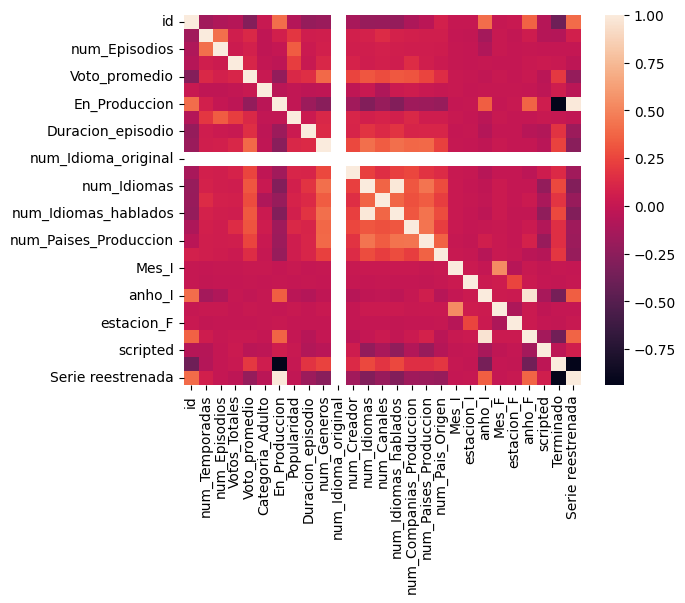

In [18]:
sns.heatmap(tmdb_corr.corr())

Del heatmap se puede observar lo siguiente: <br>
Existe una correlacion fuerte entre idiomas e idiomas hablados.<br>
Existe una gran relacion entre serie reestrenada y en produccion, esto es normal ya que si se esta restrenando, la serie debe estar produciendose. <br>
Se observa ademas (para ambos puntos anteriores) que las variables tienen el mismo comportamiento con el resto, por lo que se puede dejar solo 1 de esta sin perder informacion.<br>
Existe una relacion fuerte negativa entre una serie terminada y en reestreno, lo que hace sentido ya que no es posible que una serie existe en ambos estado al mismo tiempo.<br>


In [19]:
genero=pd.read_csv('Generos.csv')
genero.head()
pais=pd.read_csv('Paises_Produccion.csv')
pais.head()

,id_show,Paises_Produccion
0,1399.0,United Kingdom
1,1399.0,United States of America
2,71446.0,Spain
3,66732.0,United States of America
4,1402.0,United States of America


In [20]:
genero['Generos'].value_counts()

Generos
sin informacion       44210
Drama                 31267
Comedy                21633
Documentary           20384
Animation             11032
Reality               10626
Action & Adventure     6795
Crime                  6523
Family                 6232
Sci-Fi & Fantasy       5920
Mystery                4940
Kids                   3878
Talk                   3115
Soap                   1989
War & Politics         1677
News                    941
Western                 313
Romance                 181
Music                    43
History                  42
Musical                   1
Name: count, dtype: int64

## POPULARIDAD

Existen 3 valores que uno puede utilizar para comparar los programas:  
 1) Popularidad: Valor que genera la pagina en base a diversas variables, como votos, clic en el dia, popularidad del dia anterior, entre otros, es necesario recalcar que esta formula no esta disponible para el publico.   
 2) Votos Totales: Votos que ha recibido por parte de los usuarios desde que se agrego a la base 
 3) Votos Promedio: Promedio del valor de los votos recibido.

Text(0.5, 1.0, 'Votos Totales')

<Figure size 1400x800 with 0 Axes>

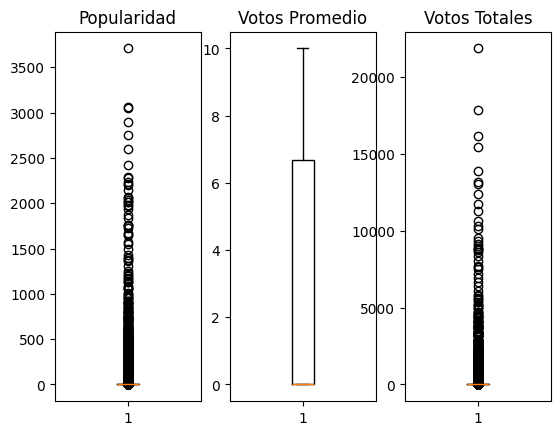

In [21]:
plt.figure(figsize=(14, 8))
fig, axs = plt.subplots(1, 3)

axs[0].boxplot(tmdb['Popularidad'])
axs[0].set_title('Popularidad')
axs[1].boxplot(tmdb['Voto_promedio'])
axs[1].set_title('Votos Promedio')
axs[2].boxplot(tmdb['Votos_Totales'])
axs[2].set_title('Votos Totales')

In [22]:
print("Top 3 segun popularidad")
print(tmdb[['Nombre_Serie','Popularidad']].sort_values('Popularidad',ascending=False).head(3))
print("Top 3 segun votos totales")
print(tmdb[['Nombre_Serie','Voto_promedio']].sort_values('Voto_promedio',ascending=False).head(3))
print("Top 3 segun votos promedio")
print(tmdb[['Nombre_Serie','Votos_Totales']].sort_values('Votos_Totales',ascending=False).head(3))

Top 3 segun popularidad
                            Nombre_Serie  Popularidad
1771  The Late Show with Stephen Colbert     3707.008
3032                       Batang Quiapo     3065.138
2283                          Tagesschau     3049.228
Top 3 segun votos totales
               Nombre_Serie  Voto_promedio
47718  Hipster Tour - Spain           10.0
40681                 温柔的背后           10.0
40640     Ghar Titli Ka Par           10.0
Top 3 segun votos promedio
      Nombre_Serie  Votos_Totales
0  Game of Thrones          21857
1      Money Heist          17836
2  Stranger Things          16161


In [23]:
print(tmdb['Popularidad'].value_counts())

Popularidad
0.600       40688
1.400        3937
0.000        2173
0.840        1424
1.960         705
            ...  
169.693         1
300.805         1
8.733           1
12.860          1
1171.542        1
Name: count, Length: 20318, dtype: int64


Se puede observar que dependiendo de cual valor se escoge, se obtienen 3 distintas respuesta a cual es el show mas popular en la pagina, ademas que los tres campos tienen los valores concentrados cerca del 0 con un 50% de los casos. Esto ocurre ya que la base se alimenta por la interaccion de usuarios por lo que no todos los usuarios votaran por cada show existente. 

## show emitidos por año 

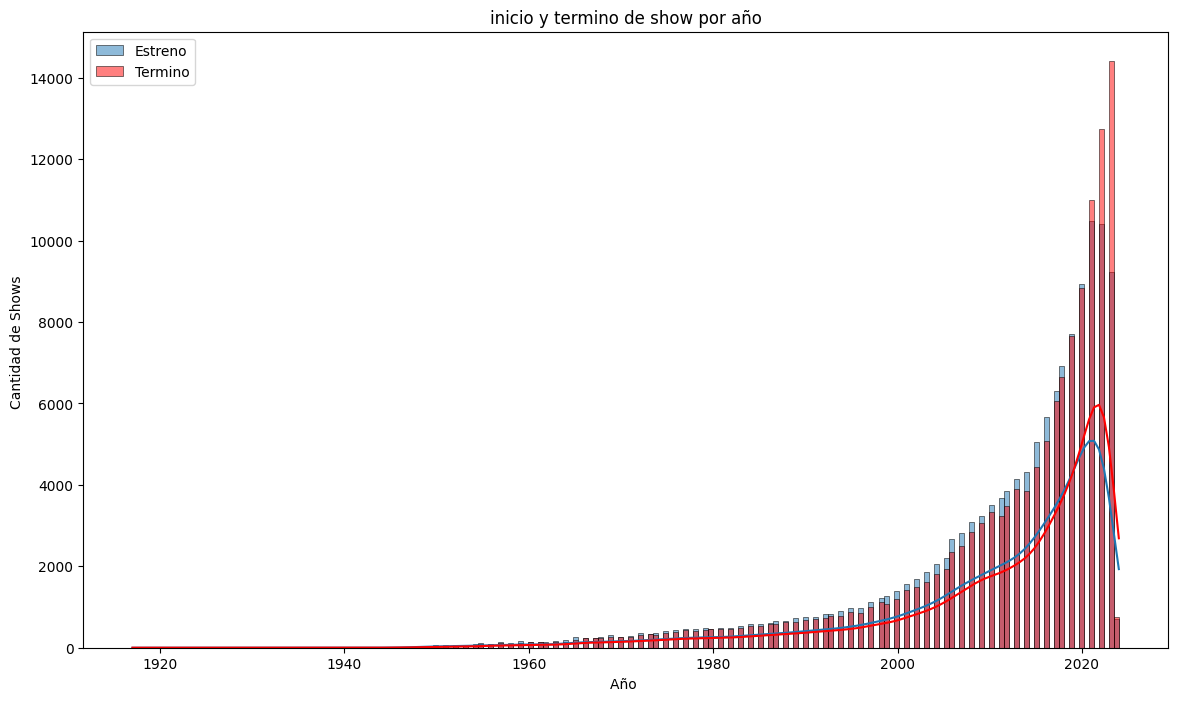

In [24]:
tmdb_fin=tmdb.copy()
tmdb_fin['Fecha_Fin']=pd.to_datetime(tmdb_fin['Fecha_Fin'])
tmdb_fin['año']=tmdb_fin['Fecha_Fin'].dt.year
tmdb_fin['mes']=tmdb_fin['Fecha_Fin'].dt.strftime('%b')
tmdb_fin['anhomes']=tmdb_fin['Fecha_Fin'].dt.to_period('M')
tmdb_inicio=tmdb.dropna(subset=['Fecha_Inicio'])
tmdb_inicio['Fecha_Inicio']=pd.to_datetime(tmdb_inicio['Fecha_Inicio'])
tmdb_inicio['año']=tmdb_inicio['Fecha_Inicio'].dt.year
tmdb_inicio['mes']=tmdb_inicio['Fecha_Inicio'].dt.strftime('%b')
tmdb_inicio['anhomes']=tmdb_inicio['Fecha_Inicio'].dt.to_period('M')

plt.figure(figsize=(14, 8))
sns.histplot(x='año', data=tmdb_inicio,label="Estreno", kde=True)
sns.histplot(x='año', data=tmdb_fin, color="red",label="Termino", kde=True)
plt.xlabel('Año ')
plt.ylabel('Cantidad de Shows ')
plt.title('inicio y termino de show por año')
plt.legend() 

plt.show()

Los estrenos por años han ido en aumento constante especialmente el 2020, se observa un notable incremento en la cantidad de shows estrenados. Este salto coincide con el inicio de la pandemia de COVID-19, un evento que generó un entorno ideal para el aumento en la producción de shows. Con las personas confinadas en sus hogares, el consumo de televisión y películas aumentó significativamente, impulsando así la creación de nuevos contenidos para satisfacer esta creciente demanda. 

En relacion a los show terminados se observa un comportamiento similar pero desfasado ya que no todos los programas terminan el mismo año de emision. Ademas es necesario destacar que cerca del último auge en la producción de shows, el número de terminaciones supera al de estrenos. Lo cual indica que los estrenos en los ultimos años a disminuido.

Generos usados y popularidad

<Axes: xlabel='count', ylabel='Generos'>

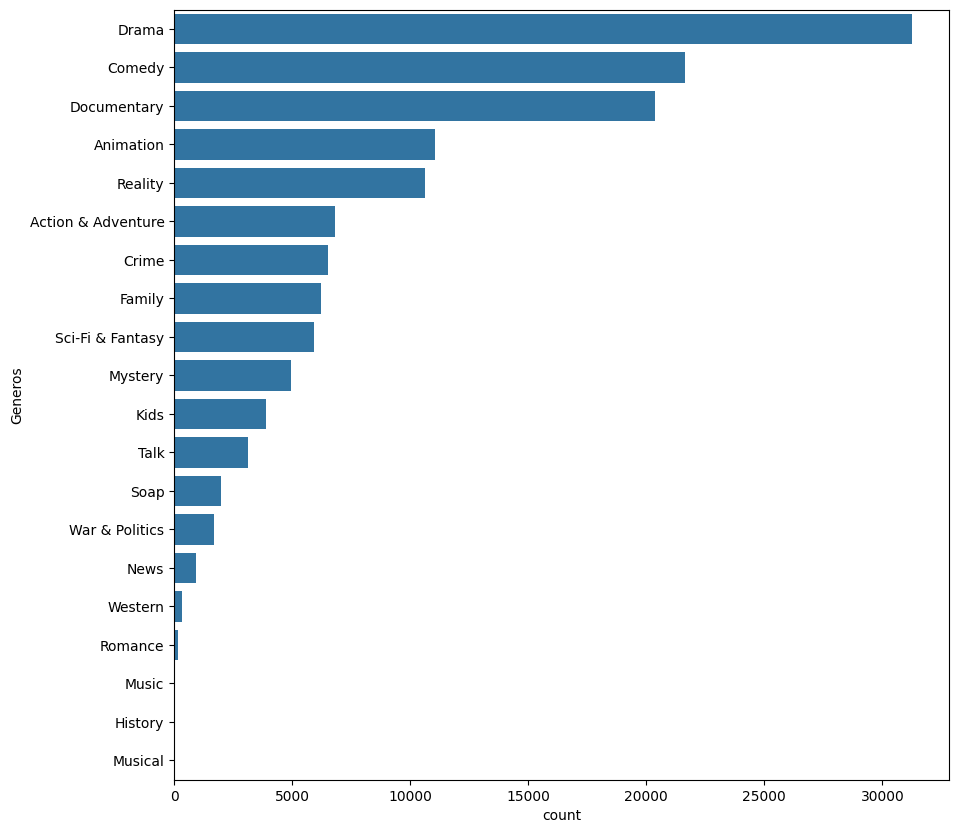

In [25]:
genero_con=genero.copy()

genero_con=genero_con[genero_con['Generos']!='sin informacion']
genero_con['Generos']=genero_con['Generos'].str.strip()
plt.figure(figsize=(10, 10))
sns.countplot(data=genero_con,y='Generos',order=genero_con['Generos'].value_counts().index)

<Figure size 3000x800 with 0 Axes>

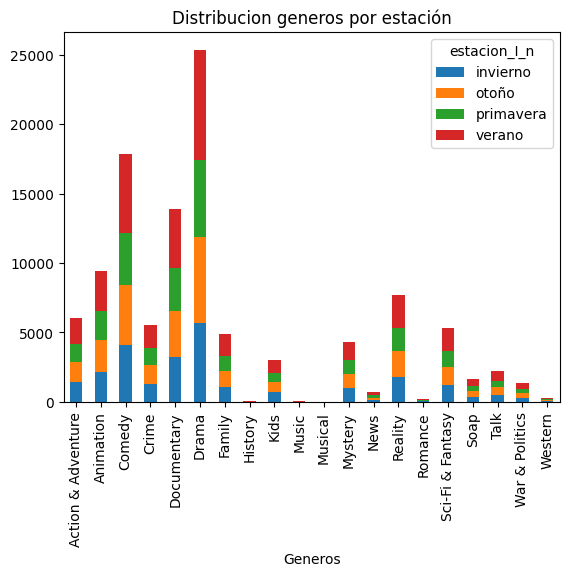

In [26]:
genero_fecha=genero_con.join(tmdb[['anho_I','anho_F','estacion_I_n','estacion_F_n']],lsuffix='_left')
df=genero_fecha.groupby(['Generos','estacion_I_n']).size().unstack(fill_value=0)
plt.figure(figsize=(20, 8)).set_figwidth(30)
df.plot(kind='bar', stacked=True)
plt.title("Distribucion generos por estación")

plt.show()


A partir de los graficos se puede analizar lo siguiente: 
Los generos tienen un comportamiento similar a los estreno con relacion a la estacion, donde en verano siempre se emiten mayor cantidad.
El top 3 corresponde a Drama, comedia y documentales, lo cual muestra un 

## EFECTO DE LA ESTACION

Text(0.5, 1.0, 'Finalizados')

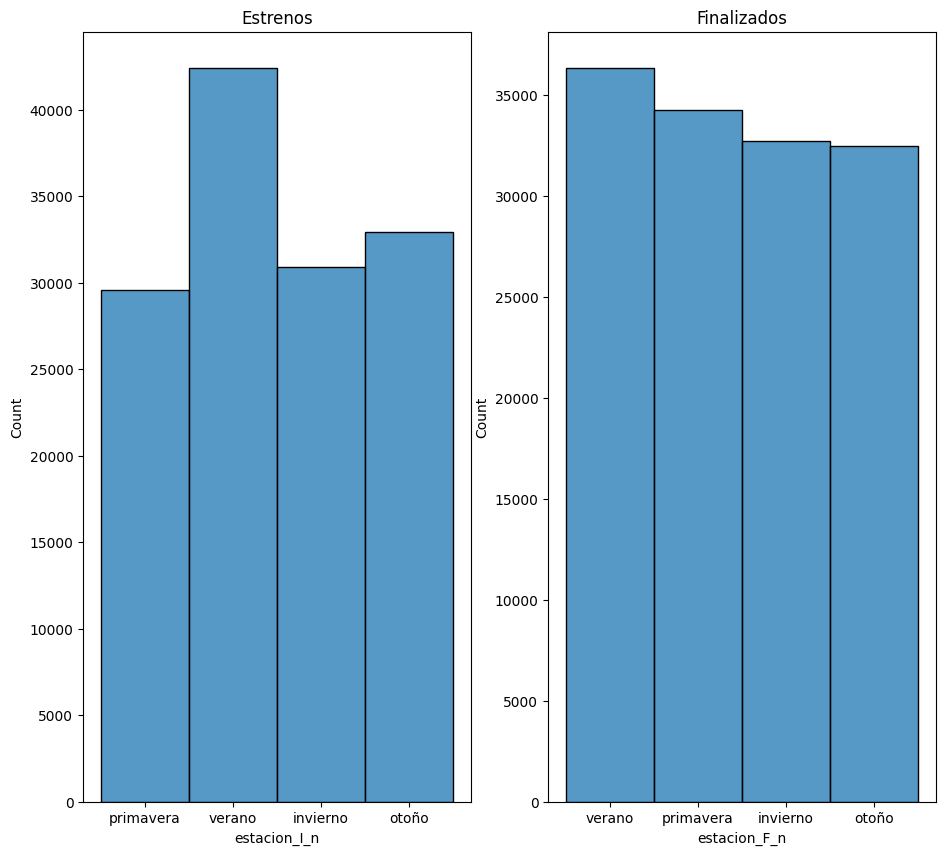

In [27]:
fig, axis = plt.subplots(1, 2, figsize = (11, 10))

# Crear un histograma múltiple

ax3=sns.histplot(ax = axis[ 0], data = tmdb, x = "estacion_I_n")
ax4=sns.histplot(ax = axis[1], data = tmdb, x = "estacion_F_n")
ax3.set_title('Estrenos')
ax4.set_title('Finalizados')

Text(0.5, 1.0, 'Estacion de año Estreno V/S Finalizado')

<Figure size 1000x1000 with 0 Axes>

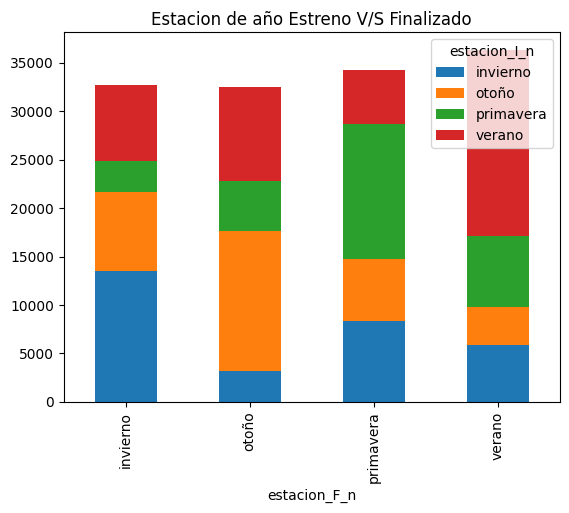

In [28]:
genero_fecha=tmdb[['anho_I','anho_F','estacion_I_n','estacion_F_n']]
df=genero_fecha.groupby(['estacion_F_n','estacion_I_n']).size().unstack(fill_value=0)
ax=plt.figure(figsize=(10, 10))
df.plot(kind='bar', stacked=True)
plt.title("Estacion de año Estreno V/S Finalizado")

In [29]:
tmdb[['estacion_I_n','estacion_F_n']].value_counts()

estacion_I_n  estacion_F_n
verano        verano          19225
otoño         otoño           14389
primavera     primavera       13867
invierno      invierno        13554
verano        otoño            9700
invierno      primavera        8302
otoño         invierno         8152
verano        invierno         7829
primavera     verano           7337
otoño         primavera        6473
invierno      verano           5861
verano        primavera        5635
primavera     otoño            5188
otoño         verano           3912
invierno      otoño            3209
primavera     invierno         3173
Name: count, dtype: int64

IDIOMAS

In [30]:
idioma=pd.read_csv('Idiomas.csv')
idioma=idioma[idioma['Idiomas']!='sin informacion']
idioma['Idiomas']=idioma['Idiomas'].str.strip()
idioma['Idiomas'].value_counts()

Idiomas
en    34467
ja    10981
zh     7796
de     6867
fr     6487
      ...  
rw        1
nv        1
ki        1
os        1
cr        1
Name: count, Length: 141, dtype: int64

Dado que tenemos mas de 100 idiomas nos centraremos en los 10 mas utilizados

In [31]:
idioma['Idiomas'].value_counts().head(10)

Idiomas
en    34467
ja    10981
zh     7796
de     6867
fr     6487
ko     4404
es     4384
pt     2871
nl     2435
ru     2088
Name: count, dtype: int64

Text(0.5, 1.0, 'top 10 idiomas ')

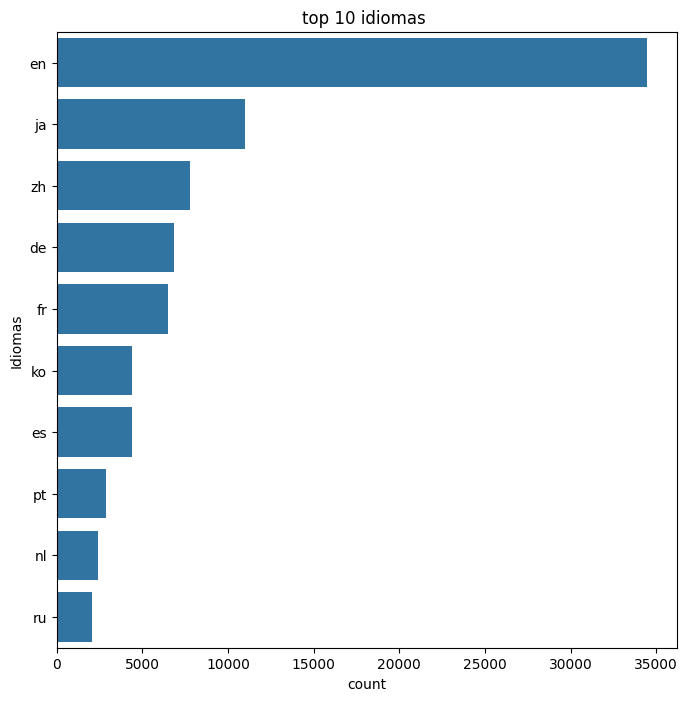

In [32]:

plt.figure(figsize=(8, 8))
sns.countplot(data=idioma,y='Idiomas',order=idioma['Idiomas'].value_counts().iloc[:10].index)
plt.title("top 10 idiomas ")

El idioma mas utilizado es el ingles, lo cual no es sorpresa ya que es el idioma mas hablado en el mundo por lo que usar este como voz principal ayuda a llegar a una mayor audiencia. Por otro lado si se considera la lengua madre,el chino y español le ganan al ingles, por lo que podria ser un mercado a explorar, pero estos idiomas sufren un problema al tener diversos dialectos.   



ref(https://www.ethnologue.com/insights/ethnologue200/)

In [33]:
tmdb.index

RangeIndex(start=0, stop=135806, step=1)

## INSIGHT

1. Se observa una posible recesion en lo show emitidos, tras la finalizacion de la pandemia.
2. No existe una relacion entre el momento que se emite un show y los generos usados.
3. Los generos mas utilizados son Drama, Comedia y documentarios.
4. El idioma mas utilizado al generar entretenimiento es el ingles. 
5. Dependiendo como se define la popularidad se obtiene diferentes resultados de cual show es consideralo el mejor. 

## Recomendaciones


Al tener menor publico, los show deben generar un mayor esfuerzo en ganarse a los usuarios por lo que es necesario una mayor planificacion en el show a emitir.

Hacer un estudio respecto a los dialectos del chino y español para ver la posibilidad de ganar audiencia apelando a la lengua madre. 


 

# Aplicacion de ML

En este apartado se explicaran e implementaran diversos metodos de ML,para abordar las preguntas clave y validar las hipótesis,  se implementarán modelos que permitan identificar patrones y predecir la popularidad de los shows en función de variables relevantes como género, fecha de emisión, idioma y otras características descriptivas.

## Seleccion de modelos 
Se utilizaran los modelos de Regresión Lineal, Random Forest y Support Vector Machines (SVM). Para cada uno de estos se seguiran los siguientes pasos:
1) Eliminar variables innecesarias 
2) Normalizar las bases
3) Separar la base en test y entrenamiento
4) entrenar los modelos 

In [34]:

from sklearn.model_selection import cross_val_score,KFold,RandomizedSearchCV,LeaveOneOut, StratifiedKFold,train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as sma
from sklearn.linear_model import LinearRegression
from sklearn.metrics import f1_score, mean_squared_error, r2_score, mean_absolute_error,mean_absolute_percentage_error, mean_squared_log_error, accuracy_score, make_scorer
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn.decomposition import PCA
from sklearn.ensemble import AdaBoostRegressor

### Regresion Lineal

In [35]:
#eliminar variables
tmdb_regresion=tmdb.copy()
tmdb_regresion=tmdb_regresion.drop(columns=['id','Nombre_Serie','Nombre_Original','Tipo_Show','Status','Pais_Origen','estacion_I_n','estacion_F_n','Fecha_Inicio','Fecha_Fin'])

In [36]:
#normalizar bases

numeric_features =["num_Temporadas","num_Episodios","Votos_Totales","Voto_promedio","Popularidad","Duracion_episodio","Mes_F",'Mes_I',"scripted","anho_I","anho_F","num_Generos","num_Idiomas"]
X = tmdb_regresion[numeric_features]
y = tmdb_regresion['Popularidad']
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)
df_normalized = pd.DataFrame(X_normalized, columns=numeric_features)
tmdb_regresion[numeric_features]=df_normalized

In [37]:
#separar bases
train_set, test_set = train_test_split(tmdb_regresion,test_size=0.3, random_state=1)



In [38]:
X_train=train_set[['Votos_Totales','Voto_promedio','num_Temporadas','num_Episodios','num_Generos']].copy()
X_test=test_set[['Votos_Totales','Voto_promedio','num_Temporadas','num_Episodios','num_Generos']].copy()
y_train=train_set['Popularidad'].copy()
y_test=test_set['Popularidad'].copy()


In [39]:

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [40]:
y_test_pred = model.predict(X_test)

In [41]:
model.intercept_

-0.0011138106394705204

In [42]:
model.coef_

array([0.18533737, 0.0460453 , 0.03455856, 0.28186758, 0.05331708])

In [43]:
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
mape = mean_absolute_percentage_error(y_test, y_test_pred)

score = model.score(X_test, y_test)

print(f'Error cuadrático medio (MSE): {mse}')
print(f'Coeficiente de determinación (R²): {r2}')
print(f'Error absoluto medio (MAE): {mae}')
print(f'Error porcentual absoluto medio (MAPE): {mape}')
print(f'Score del Modelo: {score}')

Error cuadrático medio (MSE): 0.8057727200201678
Coeficiente de determinación (R²): 0.20547522755413516
Error absoluto medio (MAE): 0.16041802421477513
Error porcentual absoluto medio (MAPE): 2.432448358520921
Score del Modelo: 0.20547522755413516


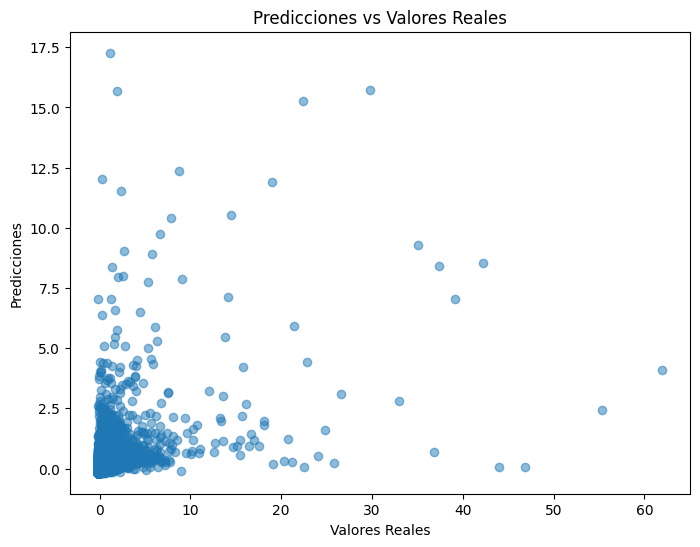

In [44]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Predicciones vs Valores Reales")
plt.show()

En relacion al modelo, muestra que la popularidad es proporcional a los votos totales, al promedio de votos, al numero de temporadas ,episodios y generos. 
Por otro lado tenemos que el R2 obtenido es de un 0.2 lo que indica que el modelo no logra representar gran parte de los valores con solo las variables escogidas

## Random Forest

In [ ]:
tmdb_forest=tmdb.copy()
tmdb_forest=tmdb_forest.drop(columns=['id','Nombre_Serie','Nombre_Original','Tipo_Show','Status','Pais_Origen','estacion_I_n','estacion_F_n','Fecha_Inicio','Fecha_Fin'])

In [46]:
numeric_features =["num_Temporadas","num_Episodios","Votos_Totales","Voto_promedio","Popularidad","Duracion_episodio","Mes_F",'Mes_I',"scripted","anho_I","anho_F","num_Generos","num_Idiomas"]
X = tmdb_forest[numeric_features]
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)
df_normalized = pd.DataFrame(X_normalized, columns=numeric_features)
tmdb_forest[numeric_features]=df_normalized

In [47]:
train_f, test_f =train_test_split(tmdb_forest,test_size=0.3, random_state=1)

In [48]:
X_train_f=train_f.drop('Popularidad',axis=1)
X_test_f=test_f.drop('Popularidad',axis=1)
y_train_f=train_f['Popularidad'].copy()
y_test_f=test_f['Popularidad'].copy()

In [49]:
model_f = RandomForestRegressor(n_estimators=50, random_state=1, n_jobs=-1)
model_f.fit(X_train_f, y_train_f)

RandomForestRegressor(n_estimators=50, n_jobs=-1, random_state=1)

In [50]:
Y_mod_f=model_f.predict(X_test_f)
model_f.score(X_test_f,y_test_f)

0.4100729909086942

In [51]:
mse = mean_squared_error(y_test, Y_mod_f)
r2 = r2_score(y_test, Y_mod_f)
mae = mean_absolute_error(y_test, Y_mod_f)
mape = mean_absolute_percentage_error(y_test, Y_mod_f)

print(f'Error cuadrático medio (MSE): {mse}')
print(f'Coeficiente de determinación (R²): {r2}')
print(f'Error absoluto medio (MAE): {mae}')
print(f'Error porcentual absoluto medio (MAPE): {mape}')


Error cuadrático medio (MSE): 0.5982785020856622
Coeficiente de determinación (R²): 0.4100729909086942
Error absoluto medio (MAE): 0.1216465396835498
Error porcentual absoluto medio (MAPE): 2.285932612490601


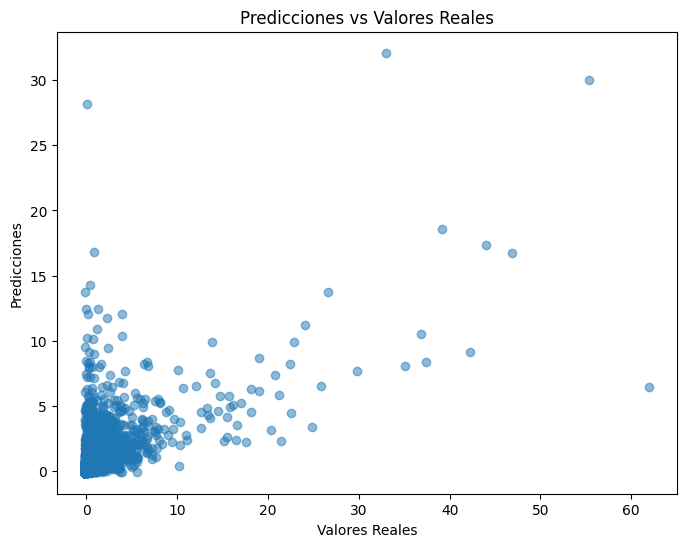

In [52]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, Y_mod_f, alpha=0.5)
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Predicciones vs Valores Reales")
plt.show()

INSERT conclusion aca

## SVN 

In [ ]:
tmdb_svn=tmdb.copy()

tmdb_svn=tmdb_svn.drop(columns=['id','Nombre_Serie','Nombre_Original','Tipo_Show','Status','Pais_Origen','estacion_I_n','estacion_F_n','Fecha_Inicio','Fecha_Fin'])
numeric_features =["num_Temporadas","num_Episodios","Votos_Totales","Voto_promedio","Popularidad","Duracion_episodio","Mes_F",'Mes_I',"scripted","anho_I","anho_F","num_Generos","num_Idiomas"]
X = tmdb_svn[numeric_features]
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)
df_normalized = pd.DataFrame(X_normalized, columns=numeric_features)
tmdb_svn[numeric_features]=df_normalized

In [ ]:
train_svn, test_svn =train_test_split(tmdb_svn,test_size=0.3, random_state=1)
X_train=train_svn.drop('Popularidad',axis=1)
X_test=test_svn.drop('Popularidad',axis=1)
y_train=train_svn['Popularidad'].copy()
y_test=test_svn['Popularidad'].copy()

In [54]:
model_svn = svm.SVR()
model_svn.fit(X_train, y_train)

SVR()

In [84]:
X_train

,num_Temporadas,num_Episodios,Votos_Totales,Voto_promedio,Categoria_Adulto,En_Produccion,Duracion_episodio,num_Generos,num_Creador,num_Idiomas,...,num_Pais_Origen,Mes_I,estacion_I,anho_I,Mes_F,estacion_F,anho_F,scripted,Terminado,Serie reestrenada
63497,-0.258142,-0.064621,-0.077571,-0.773299,False,False,-0.156973,-0.013491,0,0.412627,...,1,1.615906,0,0.553395,1.526769,0,0.480751,0.618445,1,0
60239,-0.258142,-0.098145,-0.077571,-0.773299,False,True,-0.505386,-0.013491,0,-1.412035,...,0,-1.197664,2,0.192882,-1.014033,3,0.109562,0.618445,0,1
97988,-0.258142,-0.165192,-0.077571,-0.773299,False,True,-0.238952,-0.013491,0,0.412627,...,1,-0.353593,1,0.697600,-0.449410,1,0.629227,0.618445,0,1
92197,-0.258142,-0.192011,-0.077571,-0.773299,False,True,-0.402911,-0.013491,1,0.412627,...,1,1.053192,2,0.841805,0.962146,2,0.777702,-1.616958,0,0
81979,-0.258142,-0.158487,-0.077571,-0.773299,False,True,-0.505386,-0.013491,0,0.412627,...,1,-0.916307,3,0.986011,-1.014033,3,0.926177,-1.616958,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73349,-0.258142,-0.192011,-0.077571,-0.773299,False,False,-0.505386,-0.013491,0,-1.412035,...,1,0.771835,1,-1.970195,0.679835,1,-2.117569,0.618445,1,0
109259,0.060607,-0.078030,-0.077571,-0.773299,False,True,-0.054498,-0.013491,0,0.412627,...,1,-0.634950,0,0.481293,0.397524,0,0.554989,-1.616958,0,1
50057,-0.258142,-0.044507,-0.072865,0.614950,False,False,0.109461,-0.013491,0,0.412627,...,1,0.771835,1,-3.916964,-1.296344,2,-4.047750,0.618445,1,0
5192,0.698104,0.237092,0.115368,1.086954,False,True,-0.034003,1.047989,3,0.412627,...,1,-1.479021,1,0.769703,-0.449410,1,0.851940,0.618445,0,1


In [85]:
X_test.columns

Index(['num_Temporadas', 'num_Episodios', 'Votos_Totales', 'Voto_promedio',
       'Categoria_Adulto', 'En_Produccion', 'Duracion_episodio', 'num_Generos',
       'num_Creador', 'num_Idiomas', 'num_Canales', 'num_Idiomas_hablados',
       'num_Companias_Produccion', 'num_Paises_Produccion', 'num_Pais_Origen',
       'Mes_I', 'estacion_I', 'anho_I', 'Mes_F', 'estacion_F', 'anho_F',
       'scripted', 'Terminado', 'Serie reestrenada'],
      dtype='object')

In [55]:
Y_mod_svn=model_svn.predict(X_test)


In [56]:
model_svn.score(X_test,y_test)

0.1576971713824712

In [57]:
mse = mean_squared_error(y_test, Y_mod_svn)
r2 = r2_score(y_test, Y_mod_svn)
mae = mean_absolute_error(y_test, Y_mod_svn)
mape = mean_absolute_percentage_error(y_test, Y_mod_svn)

print(f'Error cuadrático medio (MSE): {mse}')
print(f'Coeficiente de determinación (R²): {r2}')
print(f'Error absoluto medio (MAE): {mae}')
print(f'Error porcentual absoluto medio (MAPE): {mape}')

Error cuadrático medio (MSE): 0.8542271617365726
Coeficiente de determinación (R²): 0.1576971713824712
Error absoluto medio (MAE): 0.14177032772828785
Error porcentual absoluto medio (MAPE): 1.3094657362609763


## PCA

In [58]:

pca = PCA(n_components=4)

In [59]:
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [60]:
pca.explained_variance_ratio_

array([0.16047617, 0.11814576, 0.08844949, 0.08073964])

In [61]:
y_train.shape

(95064,)

In [62]:
X_train.shape

(95064, 24)

### linear regresion

In [63]:

Reg_Log = LinearRegression()
Reg_Log.fit(X_train, y_train)

# Predicting the Test set results
y_pred = Reg_Log.predict(X_test)

In [64]:
print('El r^2 es:',r2_score(y_test,y_pred))

El r^2 es: 0.20837305060393818


### random forest

In [65]:
X_train=train_f.drop('Popularidad',axis=1)
X_test=test_f.drop('Popularidad',axis=1)
y_train=train_f['Popularidad'].copy()
y_test=test_f['Popularidad'].copy()

In [66]:
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [67]:
pca.explained_variance_ratio_

array([0.16047617, 0.11814576, 0.08844949, 0.08073964])

In [68]:

model_f = RandomForestRegressor(n_estimators=50, random_state=1, n_jobs=-1)
model_f.fit(X_train, y_train)

RandomForestRegressor(n_estimators=50, n_jobs=-1, random_state=1)

In [69]:
y_pred = model_f.predict(X_test)

In [70]:
print('El r^2 es:',r2_score(y_test,y_pred))

El r^2 es: 0.13519588667673144


Se puede observar que el R2 bajo al usar el PCA tanto para la regresion lineal como el random forest

## Validacion 
En este apartado se utilizaran tecnicas de validacion para

In [95]:
# linear regresion
tmdb_regresion
X_regr=tmdb_regresion.drop('Popularidad',axis=1)
y_regr=tmdb_regresion['Popularidad'].copy()
# random forest
tmdb_forest
X_forest=tmdb_forest.drop('Popularidad',axis=1)
y_forest=tmdb_forest['Popularidad'].copy()
#svn
tmdb_svn
X_svn=tmdb_svn.drop('Popularidad',axis=1)
y_svn=tmdb_svn['Popularidad'].copy()

In [72]:
MAE = make_scorer(mean_absolute_error)
skf = StratifiedKFold(n_splits=20, random_state=1, shuffle=True)
skf.get_n_splits(X_forest, y_forest)
kf = KFold(n_splits=20,random_state=1, shuffle=True)
scores= cross_val_score(model_f,X_forest,y_forest,scoring=MAE,cv=kf)
scores

array([0.12961697, 0.11001501, 0.11828312, 0.12317696, 0.12673676,
       0.12062614, 0.10694833, 0.115522  , 0.09879371, 0.11572839,
       0.13674269, 0.11709118, 0.1256197 , 0.12160085, 0.09933015,
       0.14191282, 0.10921743, 0.11116096, 0.11619897, 0.12240012])

In [73]:
skf = StratifiedKFold(n_splits=20, random_state=1, shuffle=True)
skf.get_n_splits(X_regr,y_regr)
kf = KFold(n_splits=20,random_state=1, shuffle=True)
scores= cross_val_score(model,X_regr,y_regr,scoring=MAE,cv=kf)
scores

array([0.17401213, 0.1528186 , 0.15726686, 0.1683706 , 0.17670666,
       0.16496546, 0.15235288, 0.16049826, 0.13974395, 0.1562957 ,
       0.18024332, 0.16298101, 0.17152378, 0.15553329, 0.14274374,
       0.18972066, 0.14924703, 0.15583344, 0.16254184, 0.16789901])

In [ ]:
skf = StratifiedKFold(n_splits=20, random_state=1, shuffle=True)
skf.get_n_splits(X_svn,y_svn)
kf = KFold(n_splits=20,random_state=1, shuffle=True)
scores= cross_val_score(model_svn,X_svn,y_svn,scoring=MAE,cv=kf)
scores

## Optimizacion



In [ ]:
#parametros originales n_estimators=50, random_state=1, n_jobs=-1, max_depth=none

params_grid = {'n_estimators':[10, 30,50],
        'max_depth': [100,5,10],
        #'criterion':['absolute_error','squared_error'],
        'bootstrap': [True, False]
        }

grid_cv = RandomizedSearchCV(model_f, params_grid, scoring="r2", n_jobs=-1, cv=3)
grid_cv.fit(X_train_f, y_train_f)


RandomizedSearchCV(cv=3,
                   estimator=RandomForestRegressor(n_estimators=50, n_jobs=-1,
                                                   random_state=1),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [100, 5, 10],
                                        'n_estimators': [10, 30, 50]},
                   scoring='r2')

In [ ]:
print("Mejores parametros", grid_cv.best_params_)
print("Mejor score de CV", grid_cv.best_score_)


Mejores parametros {'n_estimators': 50, 'max_depth': 100, 'bootstrap': True}
Mejor score de CV 0.2514027349326045


Se puede observar que mientras mas nodos y estimadores le permitamos utilizar al modelo mejor resultado obtendremos, lo que tiene sentido ya que esto permite generar modelos mas complejos. 

# ensamble

In [ ]:
ada= AdaBoostRegressor(LinearRegression(), n_estimators=20, random_state=1)
ada.fit(X_train, y_train)

ada_pre= ada.predict(X_test)

In [ ]:
r2 = mean_squared_error(ada_pre,y_test_f)


In [ ]:
ada_pre

array([1.02351751, 0.24764484, 1.08190598, ..., 0.46901336, 1.07710661,
       1.18611504])

In [ ]:
y_test_f

47596    -0.138631
81105    -0.000952
14742    -0.083122
59970    -0.151480
29591    -0.109506
            ...   
43493    -0.121862
91917    -0.138631
50810    -0.095736
124409   -0.121498
31643    -0.138631
Name: Popularidad, Length: 40742, dtype: float64

In [ ]:
r2

2.4377068085768516

Se observa que el uso de AdaBoost reduce la calidad del modelo en comparación con los resultados obtenidos con anterioridad, esto se puede deber a los siguientes puntos:<br>
1-Se esta generando un sobreajuste del modelo, por lo que si el modelo original no captura de buena manera la relacion de los datos, cada iteracion puede estar amplificando este error.  <br>
2-El tipo del modelo no es el adecuado, al utilizar una regresion lineal se asume que las variables tienen un cierto comportamiento entre ellos. Al investigar en mas detalle el modo en que la se asigna el valor de popularidad, se encuentra que no es un valor fijo sino que cambia cada dia, ademas de que utiliza variables que no vienen en la base de dato original (https://developer.themoviedb.org/docs/popularity-and-trending)<br>
3-La distribucion de los datos, al analizar la distribución de popularidad, se observa una alta concentración de valores en un rango reducido, lo que dificulta que AdaBoost capture patrones significativos en los datos. La alta densidad de valores cercanos al promedio puede limitar la capacidad del modelo de entender y predecir la variabilidad, lo que afecta negativamente su desempeño.



# RESUMEN

## Calidad de los modelos 

| Modelo               | MSE    | MAE   | MAPE (%) | R²    |Tiempo de ejecucion|
|----------------------|--------|-------|----------|-------|-------------------|
| Regresión Lineal     | 0.806  | 0.160 | 2.432    | 0.205 |     <1 seg        |
| Random Forest        | 0.598  | 0.122 | 2.286    | 0.410 |     <10 seg       |
| SVM                  | 0.854  | 0.142 | 1.309    | 0.158 |       20 min      |
| Adaboost             | 0.854  | 0.142 | 1.309    | 0.158 |           10 min        |

se observa que el mejor modelo obtenido es el random forest.
Aunque se obtiene un modelo este no es mejor para poder predecir el exito de futuros show en base a las variables utilizadas, pero a partir de los discutidos se pueden .

1. Se observa una posible recesion en lo show emitidos, tras la finalizacion de la pandemia.
2. No existe una relacion entre el momento que se emite un show y los generos usados.
3. Los generos mas utilizados son Drama, Comedia y documentarios.
4. El idioma mas utilizado al generar entretenimiento es el ingles. 
5. Dependiendo como se define la popularidad se obtiene diferentes resultados de cual show es consideralo el mejor. 

# Conclusion

## Análisis exploratorio de datos
-La cantidad de shows ha aumentado de manera constante a traves de los años, alcanzando su peak en el 2020, coincidiendo con la pandemia de COVID-19, que impulsó el consumo de contenido. Sin embargo, desde entonces, se ha observado una disminución en los estrenos anuales, debido a que se normalizo las actividades de las personas. 

-Los estrenos se concentran en verano, lo que coincide conun mayor tiempo libre de la audiencia en vacaciones. En contraste, las finales de temporada están distribuidas uniformemente a lo largo del año.

-No se encontró una relación significativa entre los géneros y la temporada de emisión, ya que los géneros más populares (drama, comedia y documentales) mantienen una distribución constante.

-El inglés domina como idioma principal, lo cual es esperable por su alcance global. Sin embargo, los mercados de habla china y española representan oportunidades al ser lenguas maternas predominantes, aunque con desafíos asociados a sus múltiples dialectos.

-La definicion de popularidad influye significativamente en los resultados, mostrando diferentes rankings según el criterio usado.

## Prediccion de popularidad 
-El mejor modelo obtenido es el Random forest, tanto por timepo de ejecuccion como metricas utilizadas, aunque no es el mejor modelo para predecir la popularidadde futuros show.  

-una buena seleccion de parametros de modelos, influyen tanto en el tiempo de ejecuccion como calidad del resultado.